# 17 KNAPSACK AND GRAPH OPTIMIZATION PROBLEMS

The notion of an optimization problem provides a structured way to think about solving lots of computational problems.

In general, an optimization problem has two parts:

1. <b>An objective function</b> that is to be maximized or minimized. For example, the airfare between Boston and Istanbul.

2. <b>A set of constraints</b> (possibly empty) that must be honored. For example, an upper bound on the travel time.

The main things to take away from this chapter are:
<ul>
<li>Many problems of real importance can be simply formulated in a way that leads naturally to a computational solution.
<li>Reducing a seemingly new problem to an instance of a well-known problem allows one to use preexisting solutions.
<li>Exhaustive enumeration algorithms provide a simple, but often computationally intractable, way to search for optimal solutions.
<li>A greedy algorithm is often a practical approach to finding a pretty good,but not always optimal, solution to an optimization problem.
<li>Knapsack problems and graph problems are classes of problems to which other problems can often be reduced.
</ul>

## 17.1 Knapsack Problems

What’s a poor burglar to do? He needs to find the set of things that provides <b>the most value without exceeding his carrying capacity</b>

The simplest way to find an approximate solution to this problem is to use a <b>greedy</b> algorithm. 

The thief would choose <b>the best item first</b>, then <b>the next best</b>, and <b>continue</b> until he reached his limit.

Of course, before doing this, the thief would have to decide <b>what “best” should mean</b>.

Is the best item the most valuable, the least heavy, or maybe the item with the highest value-to-weight ratio?

### 17.1.1 Greedy Algorithms

The simplest way to find an approximate solution to this problem is to use a <b>greedy</b> algorithm. 

The thief would choose <b>the best item first</b>, then <b>the next best</b>, and <b>continue</b> until he reached his limit.r burglar to do? He needs to find the set of things that provides <b>the most value without exceeding his carrying capacity</b>

Suppose for example, a burglar who has a knapsack109 that can hold <b>at most 20 pounds</b> of loot breaks into a house and finds the items in Figure 17.1.

<img src="./img/17.1.PNG"/>


### 17.1.1 Greedy Algorithms

The simplest way to find an approximate solution to this problem is to use a <b>greedy</b> algorithm. 

The thief would choose <b>the best item first</b>, then <b>the next best</b>, and <b>continue</b> until he reached his limit.

Of course, before doing this, the thief would have to decide <b>what “best” should mean</b>.

Is the best item the most valuable, the least heavy, or maybe the item with the highest value-to-weight ratio?
<ul>
<li>If he chose highest value, he would leave with just the computer, which he could fence for 200.
<li>If he chose lowest weight, he would take, in order, the book, the radio, the vase, and the painting—which would be worth a total of 170.
<li>if he decided that best meant highest value-to-weight ratio,The total value of his loot would be 255.
</ul>

More generally, there is <b>no guarantee</b> that any solution to this kind of knapsack problem that is
found by  <b>a greedy algorithm will be optimal </b>

The code in Figure 17.2 and Figure 17.3 implements all three of these greedy algorithms.

The only interesting code is the implementation of the function greedy

We use the built-in Python function <b>sorted<b> to do this. 

We use the <b>reverse</b> parameter to indicate that we want the list sorted <b>from largest (with respect to keyFunction) to smallest</b>

In [1]:
#Page 236, Figure 17.2
class Item(object):
    def __init__(self, n, v, w):
        self.name = n
        self.value = float(v)
        self.weight = float(w)
    def getName(self):
        return self.name
    def getValue(self):
        return self.value
    def getWeight(self):
        return self.weight
    def __str__(self):
        result = '<' + self.name + ', ' + str(self.value)\
                 + ', ' + str(self.weight) + '>'
        return result

def value(item):
    return item.getValue()

def weightInverse(item):
    return 1.0/item.getWeight()

def density(item):
    return item.getValue()/item.getWeight()

def buildItems():
    names = ['clock', 'painting', 'radio', 'vase', 'book', 'computer']
    values = [175,90,20,50,10,200]
    weights = [10,9,4,2,1,20]
    Items = []
    for i in range(len(values)):
        Items.append(Item(names[i], values[i], weights[i]))
    return Items


In [4]:
#Page 237, Figure 17.3
def greedy(items, maxWeight, keyFunction):
    """Assumes Items a list, maxWeight >= 0,
         keyFunction maps elements of Items to floats"""
    itemsCopy = sorted(items, key=keyFunction, reverse = True)
    result = []
    totalValue = 0.0
    totalWeight = 0.0
    for i in range(len(itemsCopy)):
        if (totalWeight + itemsCopy[i].getWeight()) <= maxWeight:
            result.append(itemsCopy[i])
            totalWeight += itemsCopy[i].getWeight()
            totalValue += itemsCopy[i].getValue()
    return (result, totalValue)

def testGreedy(items, constraint, keyFunction):
    taken, val = greedy(items, constraint, keyFunction)
    print('Total value of items taken = ', val)
    for item in taken:
        print('   ', item)

def testGreedys(maxWeight = 20):
    items = buildItems()
    print( 'Use greedy by value to fill knapsack of size', maxWeight)
    testGreedy(items, maxWeight, value)
    print( '\nUse greedy by weight to fill knapsack of size', maxWeight)
    testGreedy(items, maxWeight, weightInverse)
    print( '\nUse greedy by density to fill knapsack of size', maxWeight)
    testGreedy(items, maxWeight, density)

In [5]:
testGreedys()

Use greedy by value to fill knapsack of size 20
Total value of items taken =  200.0
    <computer, 200.0, 20.0>

Use greedy by weight to fill knapsack of size 20
Total value of items taken =  170.0
    <book, 10.0, 1.0>
    <vase, 50.0, 2.0>
    <radio, 20.0, 4.0>
    <painting, 90.0, 9.0>

Use greedy by density to fill knapsack of size 20
Total value of items taken =  255.0
    <vase, 50.0, 2.0>
    <clock, 175.0, 10.0>
    <book, 10.0, 1.0>
    <radio, 20.0, 4.0>


What is the algorithmic efficiency of greedy? 

There are two things to consider:

the time complexity of the built-in function sorted:  O(n log n)

the number of times through the for loop in the body of greedy: O(n)

the running time of greedy is O(n log n).

### 17.1.2 An Optimal Solution to the 0/1 Knapsack Problem

Suppose we decide that an approximation is not good enough, i.e., we want <b>the best possible solution</b> to this problem. Such a solution is called <b>optimal</b>, not surprising since we are solving an optimization problem. 

As it happens, this is an instance of a classic optimization problem, called <b>the 0/1 knapsack problem</b>.

The 0/1 knapsack problem can be formalized as follows:
<ul>
<li>Each item is represented by a pair, <  value, weight  >.
<li>The knapsack can accommodate items with a total weight of no more than w.
<li>A vector, I, of length n, represents the set of available items. Each element of the vector is an item.
<li>A vector, V, of length n, is used to indicate whether or not each item is taken by the burglar. If V[i] = 1, item I[i] is taken. If V[i] = 0, item I[i] is not taken.
<li>Find a V that maximizes

$\sum_{i=0}^{n-1} V[i]*I[i].valus$

subject to the constraint that:

$\sum_{i=0}^{n-1} V[i]*I[i].wejght \leq w$

Let’s see what happens if we try to implement this formulation of the problem in a straightforward way:




In [8]:
#Page 121, Figure 9.5
def getBinaryRep(n, numDigits):
   """Assumes n and numDigits are non-negative ints
      Returns a numDigits str that is a binary
      representation of n"""
   result = ''
   while n > 0:
      result = str(n%2) + result
      n = n//2
   if len(result) > numDigits:
      raise ValueError('not enough digits')
   for i in range(numDigits - len(result)):
      result = '0' + result
   return result

def genPowerset(L):
   """Assumes L is a list
      Returns a list of lists that contains all possible
      combinations of the elements of L.  E.g., if
      L is [1, 2] it will return a list with elements
      [], [1], [2], and [1,2]."""
   powerset = []
   for i in range(0, 2**len(L)):
      binStr = getBinaryRep(i, len(L))
      subset = []
      for j in range(len(L)):
         if binStr[j] == '1':
            subset.append(L[j])
      powerset.append(subset)
   return powerset


#Page 239, Figure 17.4
def chooseBest(pset, maxWeight, getVal, getWeight):
    bestVal = 0.0
    bestSet = None
    for items in pset:  # 2^n
        itemsVal = 0.0
        itemsWeight = 0.0
        for item in items:    # n
            itemsVal += getVal(item)
            itemsWeight += getWeight(item)
        if itemsWeight <= maxWeight and itemsVal > bestVal:
            bestVal = itemsVal
            bestSet = items
    return (bestSet, bestVal)

def testBest(maxWeight = 20):
    items = buildItems()
    pset = genPowerset(items)
    taken, val = chooseBest(pset, maxWeight, Item.getValue,
                            Item.getWeight)
    print('Total value of items taken =', val)
    for item in taken:
        print (item)

The complexity of this implementation is O(n*2n)

In [9]:
testBest()

Total value of items taken = 275.0
<clock, 175.0, 10.0>
<painting, 90.0, 9.0>
<book, 10.0, 1.0>


Notice that this solution is <b>better</b> than any of the solutions found by the greedy algorithms.

The essence of a greedy algorithm is making the best (as defined by some metric) local choice at each step.

It makes a choice that is <b>locally optimal</b>.

However, as this example illustrates, a series of locally optimal decisions does not always lead to a solution that is <b>globally optimal</b>.

There is a variant of the knapsack problem, called <b>the fractional (or continuous) knapsack problem</b>, for which a greedy algorithm is guaranteed to find an optimal solution.

## 17.2 Graph Optimization Problems

A <b>graph</b> is a set of objects called <b>nodes (or vertices)</b> connected by a set of <b>edges (or arcs)</b>.

If the edges are <b>unidirectional</b> the graph is called <b>a directed graph or digraph</b>.

In <b>a directed graph</b>, if there is an edge from n1 to n2, we refer to n1 as the <b>source or parent node</b> and n2 as <b>the destination or child node</b>.

Graphs are typically used to represent situations in which there are interesting relations among the parts. 

The first documented use of graphs in mathematics was in 1735 when the Swiss mathematician Leonhard Euler used what has
come to be known as <b>graph theory</b> to formulate and solve the <b>Königsberg bridges problem</b>.

Königsberg, then the capital of East Prussia, was built at the intersection of two rivers that contained a number of islands. The islands were connected to each other and to the mainland by seven bridges, as shown on the map below.

For some reason, the residents of the city were obsessed with the question of whether it was possible to <b>take a walk that crossed each bridge exactly once</b>.

Euler’s great insight was that the problem could be vastly simplified by viewing each separate landmass as a point (think “node”) and each bridge as a line (think “edge”) connecting two of these points. The map of the town could then
be represented by the graph to the right of the map.

Euler then reasoned that if a walk were to traverse each edge exactly once, it must be the case that<b> each
node in the middle of the walk</b> (i.e., any node except the first and last node visited) must have <b>an even number of edges</b>to which it is connected.

Since <b>none of the nodes in this graph<b> has an even number of edges, Euler concluded that it is <b>impossible</b> to traverse each bridge exactly once.

<img src="./img/17.3.PNG"/> 


Figure 17.5 contains classes implementing abstract types corresponding to nodes, weighted edges, and edges.

In [2]:
#Page 242, Figure 17.5
class Node(object):
    def __init__(self, name):
        """Assumes name is a string"""
        self.name = name
    def getName(self):
        return self.name
    def __str__(self):
        return self.name

class Edge(object):
    def __init__(self, src, dest):
        """Assumes src and dest are nodes"""
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()

class WeightedEdge(Edge):
    def __init__(self, src, dest, weight = 1.0):
        """Assumes src and dest are nodes, weight a float"""
        self.src = src
        self.dest = dest
        self.weight = weight
    def getWeight(self):
        return self.weight
    def __str__(self):
        return self.src.getName() + '->(' + str(self.weight) + ')'\
               + self.dest.getName()

Figure 17.6 contains implementations of the classes <b>Digraph</b> and <b>Graph</b>

One important decision is <b>the choice of data structure used to represent a Digraph.</b>

One common representation is an n × n <b>adjacency matrix</b>, where n is the number of nodes in the graph. Each cell of the matrix contains information (e.g., weights) about the edges connecting the pair of nodes <i, j>. If the edges
are unweighted, each entry is True if and only if there is an edge from i to j.

Another common representation is <b>an adjacency list</b>, which we use here. 

Class <b>Digraph</b> has two instance variables:

The variable <b>nodes</b> is a Python list containing the names of the nodes in the Digraph. The connectivity of the nodes is represented using an adjacency list implemented as a dictionary.

The variable <b>edges</b> is a dictionary that maps each Node in the Digraph to a list of the children of that Node.

Class Graph is a subclass of Digraph. It inherits all of the methods of Digraph except addEdge, which it overrides.

In [3]:
#Page 243, Figure 17.6
class Digraph(object):
    #nodes is a list of the nodes in the graph
    #edges is a dict mapping each node to a list of its children
    def __init__(self):
        self.nodes = []
        self.edges = {}
    
    def addNode(self, node):
        if node in self.nodes:
            raise ValueError('Duplicate node')
        else:
            self.nodes.append(node)
            self.edges[node] = []
    
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not(src in self.nodes and dest in self.nodes):
            raise ValueError('Node not in graph')
        self.edges[src].append(dest)
    
    def childrenOf(self, node):
        return self.edges[node]
    
    def hasNode(self, node):
        return node in self.nodes
    
    def __str__(self):
        result = ''
        for src in self.nodes:
            for dest in self.edges[src]:
                result = result + src.getName() + '->'\
                         + dest.getName() + '\n'
        return result[:-1] #omit final newline

class Graph(Digraph):
    
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)
        
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)

### 17.2.1 Some Classic Graph-Theoretic Problems

Some of the best-known graph optimization problems are:
<ul>
<li><b>Shortest path</b>. For some pair of nodes, N1 and N2, find the shortest sequence of edges <sn, dn> (source node and destination node), such that
<ul>
<li>The source node in the first edge is N1
<li>The destination node of the last edge is N2
<li>For all edges e1 and e2 in the sequence, if e2 follows e1 in the sequence, the source node of e2 is the destination node of e1 i.
</ul>
<li><b>Shortest weighted path</b>. This is like the shortest path, except instead of choosing the shortest sequence of edges that connects two nodes, we define some function on the weights of the edges in the sequence (e.g.,
their sum) and minimize that value.
<li><b>Cliques</b>. Find a set of nodes such that there is a path (or often a path not exceeding a maximum length) in the graph between each pair of nodes in the set.
<li><b>Min cut</b>. Given two sets of nodes in a graph, a <b>cut</b> is a set of edges whose removal <b>eliminates all paths</b> from each node in one set to each node in the other.The minimum cut is the smallest set of edges whose removal accomplishes this.
</ul>


### 17.2.2 The Spread of Disease and Min Cut

Figure 17.7 contains a pictorial representation of a weighted graph generated by the U.S. Centers for Disease Control (CDC) in the course of studying an outbreak of tuberculosis in the United States.

Each <b>node</b> represents a person, and each node is labeled by a color116 indicating whether the person has active
TB, tested positive for exposure to TB (i.e., high TST reaction rate), tested negative for exposure to TB, or had not been tested.

The <b>edges</b> represent contact between pairs of people. 

The <b>weights</b>, which are not visible in the picture, indicate whether the contact between people was “close” or “casual.”

<img src="./img/17.7.PNG"/> 

There are many interesting questions that can be formalized using this graph
<ul>
<li>Is it possible that all cases stemmed from a single “index” patient? The answer is “almost.” There is path from the node in the middle of the graph to each active TB node except those nodes in the black circle on the right.

<img src="./img/17.7.1.PNG"/> 

<li>In order to best limit the continued spread, which uninfected people should be vaccinated? This can be formalized as solving <b>a min cut problem</b>.


### 17.2.3 Shortest Path: Depth-First Search and Breadth-First Search

Social networks are made up of individuals and relationships between individuals. These are typically modeled as graphs in which the individuals are nodes and the edges relationships. If the relationships are symmetric, the edgesare undirected; if the relationships are asymmetric the edges are directed. Some social networks model multiple kinds of relationships, in which case labels on the edges indicate the kind of relationship. 

In 1990，the playwright John Guare wrote <b> Six Degrees of Separation</b>. The slightly dubious premise underlying the play is that “everybody on this planet is separated by only six other people.”

A less hypothetical question is the distance using the “friend” relation between pairs of people on Facebook.

The friend relation (at least on Facebook) is symmetric, e.g., if Stephanie is a friend of Andrea, Andrea is a friend of Stephanie. We will, therefore, implement the social network using type Graph. We can then define the problem of finding the shortest connection between you and Mick Jagger as:

• For the graph G, find the shortest sequence of nodes,path = [You,…,Mick Jagger], such that
• If ni and ni+1 are consecutive nodes in path, there is an edge in G connecting ni and ni+1.

Figure 17.8 contains a recursive function that finds the shortest path between two nodes, start and end, in a Digraph. Since Graph is a subclass of Digraph, it will work for our Facebook problem.

The algorithm implemented by DFS is an example of a recursive <b>depth-first search (DFS) </b> algorithm.

The algorithm implemented by DFS is an example of a recursive depth-firstsearch (DFS) algorithm. 

In general, a depth-first-search algorithm begins by choosing one child of the start node. It then chooses one child of that node and so on, going deeper and deeper until it either reaches the goal node or a node with no children. 

The search then <b>backtracks</b>, returning to <b>the most recent node with children that it has not yet visited</b>. 

<img src="./img/dfs.PNG"/> 

```
begin of search:

A->B->E,

backtrack to A

A->C->F->H->G->D,

backtrack A, 

all children has visited，

end of search.
```

When all paths have been explored, it chooses the shortest path (assuming that there is one) from the start
to the goal.

The code is a bit more complicated than the algorithm we just described：

1）It has to deal with the possibility of the graph containing cycles.

2） It also avoids exploring paths longer than the shortest path that it has already found

<ul>
<li>The function search calls DFS with path = [] (to indicate that the current
path being explored is empty) and shortest = None (to indicate that no
path from start to end has yet been found).
<li> DFS begins by choosing one child of start. It then chooses one child of
that node and so on, until either it reaches the node end or a node with
no unvisited children.
<ul>
<li>The check```if node not in path```prevents the program from getting caught in a cycle.
<li>The check```if shortest == None or len(path) < len(shortest)```is used to decide if it is possible that continuing to search this path might yield a shorter path than the best path found so far.
<li>If so, DFS is called recursively. If it finds a path to end that is no longer than the best found so far, shortest is updated.
<li>When the last node on path has no children left to visit, the program backtracks to the previously visited node and visits the next child of that node.
</ul>
<li> The function returns when all possibly shortest paths from start to end have been explored.
</ul>

In [4]:
#Page 248, Figure 17.8
def printPath(path):
    """Assumes path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result 

def DFS(graph, start, end, path, shortest):
    """Assumes graph is a Digraph; start and end are nodes;
          path and shortest are lists of nodes
       Returns a shortest path from start to end in graph"""
    path = path + [start]
    print('Current DFS path:', printPath(path))
    if start == end:
        return path
    
    for node in graph.childrenOf(start):
        if node not in path: # avoid cycles
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph, node, end, path, shortest)
                if newPath != None:
                    shortest = newPath
    return shortest

def search(graph, start, end):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None)

Figure 17.9 contains some code that runs the code in Figure. The function testSP in Figure 17.9 first builds a directed graph like the one pictured on the right, and then searches for a shortest path between node 0 and node 5.
<img src="./img/17.9.PNG"/> 

In [5]:
#Page 248, Figure 17.9
def testSP():
    nodes = []
    for name in range(6): #Create 6 nodes
        nodes.append(Node(str(name)))
   
    g = Digraph()
    for n in nodes:
        g.addNode(n)
    
    g.addEdge(Edge(nodes[0],nodes[1]))
    g.addEdge(Edge(nodes[1],nodes[2]))
    g.addEdge(Edge(nodes[2],nodes[3]))
    g.addEdge(Edge(nodes[2],nodes[4]))
    g.addEdge(Edge(nodes[3],nodes[4]))
    g.addEdge(Edge(nodes[3],nodes[5]))
    g.addEdge(Edge(nodes[0],nodes[2]))
    g.addEdge(Edge(nodes[1],nodes[0]))
    g.addEdge(Edge(nodes[3],nodes[1]))
    g.addEdge(Edge(nodes[4],nodes[0]))
    
    sp = search(g, nodes[0], nodes[5])
    print('\nShortest path found by DFS:', printPath(sp))

In [6]:
testSP()

Current DFS path: 0
Current DFS path: 0->1
Current DFS path: 0->1->2
Current DFS path: 0->1->2->3
Current DFS path: 0->1->2->3->4
Current DFS path: 0->1->2->3->5
Current DFS path: 0->1->2->4
Current DFS path: 0->2
Current DFS path: 0->2->3
Current DFS path: 0->2->3->4
Current DFS path: 0->2->3->5
Current DFS path: 0->2->3->1
Current DFS path: 0->2->4

Shortest path found by DFS: 0->2->3->5


Notice that after exploring the path 0->1->2->3->4, 

it backs up to node 3 and explores the path 0->1->2->3->5. After saving that as the shortest successful path so far, 

it backs up to node 2 and explores the path 0->1->2->4. 

When it reaches the end of that path (node 4), it backs up all the way to node 0 and  investigates the path starting with the edge from 0 to 2. And so on.

### breadth-first search (BFS). 

Of course, there are other ways to traverse a graph than depth-first. Another common approach is <b>breadth-first search (BFS)</b>. 

In a breadth-first traversal one first visits <b>all children</b> of the start node. If none of those is the end node, one visits <b>all children</b> of each of those nodes. And so on.

Unlike depth-first search, which is usually implemented recursively, breadth-first search is usually implemented <b>iteratively<b>. 

<b>BFS explores many paths simultaneously/<b>, adding one node to each path on each iteration. Since it generates the paths in <b>ascending order of length</b> , <b>the first path found</b>  with the goal as its last node is guaranteed to </b> have a minimum number of edges</b> .

Figure 17.10 contains code that uses a breadth-first search to find the shortest path in a directed graph.

The variable <b>pathQueue</b> is used to store all of the paths currently being explored. 

Each iteration starts by <b>removing a path from pathQueue and assigning that path tmpPath</b>. If the last node in tmpPath is end, tmpPath is returned. Otherwise, a set of new paths is created, each of which extends tmpPath by adding one of its children. Each of these new paths is then added to pathQueue.

In [21]:
#Page 250, Figure 17.10
def BFS(graph, start, end):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    
    initPath = [start]
    pathQueue = [initPath]  
    
    while len(pathQueue) != 0:
        #Get and remove oldest element in pathQueue
        tmpPath = pathQueue.pop(0)
        print('Current BFS path:', printPath(tmpPath))
        lastNode = tmpPath[-1]
        
        if lastNode == end:
            return tmpPath
        
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]
                pathQueue.append(newPath)
    
    return None


In [19]:

def testSP():
    nodes = []
    for name in range(6): #Create 6 nodes
        nodes.append(Node(str(name)))
    g = Digraph()
    for n in nodes:
        g.addNode(n)
    g.addEdge(Edge(nodes[0],nodes[1]))
    g.addEdge(Edge(nodes[1],nodes[2]))
    g.addEdge(Edge(nodes[2],nodes[3]))
    g.addEdge(Edge(nodes[2],nodes[4]))
    g.addEdge(Edge(nodes[3],nodes[4]))
    g.addEdge(Edge(nodes[3],nodes[5]))
    g.addEdge(Edge(nodes[0],nodes[2]))
    g.addEdge(Edge(nodes[1],nodes[0]))
    g.addEdge(Edge(nodes[3],nodes[1]))
    g.addEdge(Edge(nodes[4],nodes[0]))
    
    sp = search(g, nodes[0], nodes[5])
    print('\nShortest path found by DFS', printPath(sp))
    
    print('\n')
    sp = BFS(g, nodes[0], nodes[5])
    print('\nShortest path found by BFS:', printPath(sp))


In [20]:
testSP()

Current DFS path: 0
Current DFS path: 0->1
Current DFS path: 0->1->2
Current DFS path: 0->1->2->3
Current DFS path: 0->1->2->3->4
Current DFS path: 0->1->2->3->5
Current DFS path: 0->1->2->4
Current DFS path: 0->2
Current DFS path: 0->2->3
Current DFS path: 0->2->3->4
Current DFS path: 0->2->3->5
Current DFS path: 0->2->3->1
Current DFS path: 0->2->4

Shortest path found by DFS 0->2->3->5


1
0
Current BFS path: 0
Current BFS path: 0->1
Current BFS path: 0->2
Current BFS path: 0->1->2
Current BFS path: 0->2->3
Current BFS path: 0->2->4
Current BFS path: 0->1->2->3
Current BFS path: 0->1->2->4
Current BFS path: 0->2->3->4
Current BFS path: 0->2->3->5

Shortest path found by BFS: 0->2->3->5


Comfortingly, each algorithm found a path of the same length. In this case, they found the same path. However, if a graph contains more than one shortest path between a pair of nodes, DFS and BFS will not necessarily find the same
shortest path.

BFS is a convenient way to search for a path with the fewest edges because the first time a path is found, it is guaranteed to be such a path.

## NetworkX

NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks

https://github.com/networkx/networkx

>pip install networkx

In [17]:
# DiGraph

import networkx as nx
G=nx.DiGraph()
G.add_nodes_from([0,1,2,3,4,5])
G.add_edges_from([(0,1),(1,2),(2,3),(2,4),(3,4),(3,5),(0,2),(1,0),(3,1),(4,0)])  

try:
    path=nx.shortest_path(G,0,5)
    print(path)
except nx.NetworkXNoPath:
    print('No path')

[0, 2, 3, 5]


In [16]:
# Graph

import networkx as nx
G=nx.Graph()
G.add_nodes_from([0,1,2,3,4,5])
G.add_edges_from([(0,1),(1,2),(2,3),(2,4),(3,4),(3,5),(0,2),(1,0),(3,1),(4,0)])  

try:
    path=nx.shortest_path(G,0,5)
    print(path)
except nx.NetworkXNoPath:
    print('No path')

[0, 1, 3, 5]


In [18]:
import networkx as nx
g = nx.Graph()
g.add_edge('a', 'b', distance=0.3)
g.add_edge('a', 'c', distance=0.7)
nx.dijkstra_path_length(g, 'b', 'c', 'distance')


1.0

#### networkx examples

Napoleon's 1812-1813  Russian Campaig

http://networkx.github.io/documentation/latest/examples/

http://networkx.github.io/documentation/latest/examples/graph/napoleon_russian_campaign.html
    

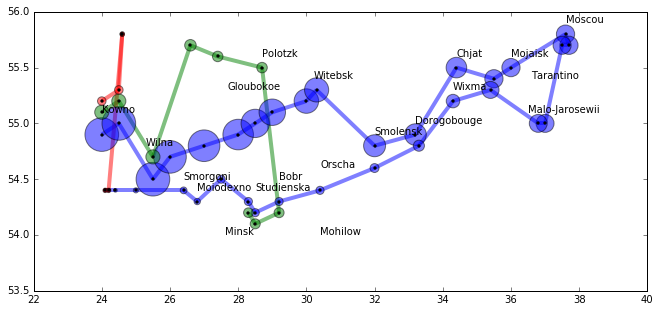

In [1]:
%matplotlib inline  


"""
Minard's data from Napoleon's 1812-1813  Russian Campaign.
http://www.math.yorku.ca/SCS/Gallery/minard/minard.txt

"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
#    Copyright (C) 2006 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import string
import networkx as nx

def minard_graph():
    data1="""\
24.0,54.9,340000,A,1
24.5,55.0,340000,A,1
25.5,54.5,340000,A,1
26.0,54.7,320000,A,1
27.0,54.8,300000,A,1
28.0,54.9,280000,A,1
28.5,55.0,240000,A,1
29.0,55.1,210000,A,1
30.0,55.2,180000,A,1
30.3,55.3,175000,A,1
32.0,54.8,145000,A,1
33.2,54.9,140000,A,1
34.4,55.5,127100,A,1
35.5,55.4,100000,A,1
36.0,55.5,100000,A,1
37.6,55.8,100000,A,1
37.7,55.7,100000,R,1
37.5,55.7,98000,R,1
37.0,55.0,97000,R,1
36.8,55.0,96000,R,1
35.4,55.3,87000,R,1
34.3,55.2,55000,R,1
33.3,54.8,37000,R,1
32.0,54.6,24000,R,1
30.4,54.4,20000,R,1
29.2,54.3,20000,R,1
28.5,54.2,20000,R,1
28.3,54.3,20000,R,1
27.5,54.5,20000,R,1
26.8,54.3,12000,R,1
26.4,54.4,14000,R,1
25.0,54.4,8000,R,1
24.4,54.4,4000,R,1
24.2,54.4,4000,R,1
24.1,54.4,4000,R,1"""
    data2="""\
24.0,55.1,60000,A,2
24.5,55.2,60000,A,2
25.5,54.7,60000,A,2
26.6,55.7,40000,A,2
27.4,55.6,33000,A,2
28.7,55.5,33000,R,2
29.2,54.2,30000,R,2
28.5,54.1,30000,R,2
28.3,54.2,28000,R,2"""
    data3="""\
24.0,55.2,22000,A,3
24.5,55.3,22000,A,3
24.6,55.8,6000,A,3
24.6,55.8,6000,R,3
24.2,54.4,6000,R,3
24.1,54.4,6000,R,3"""
    cities="""\
24.0,55.0,Kowno
25.3,54.7,Wilna
26.4,54.4,Smorgoni
26.8,54.3,Moiodexno
27.7,55.2,Gloubokoe
27.6,53.9,Minsk
28.5,54.3,Studienska
28.7,55.5,Polotzk
29.2,54.4,Bobr
30.2,55.3,Witebsk
30.4,54.5,Orscha
30.4,53.9,Mohilow
32.0,54.8,Smolensk
33.2,54.9,Dorogobouge
34.3,55.2,Wixma
34.4,55.5,Chjat
36.0,55.5,Mojaisk
37.6,55.8,Moscou
36.6,55.3,Tarantino
36.5,55.0,Malo-Jarosewii"""

    c={}
    for line in cities.split('\n'):
        x,y,name=line.split(',')
        c[name]=(float(x),float(y))

    g=[]

    for data in [data1,data2,data3]:
        G=nx.Graph()
        i=0
        G.pos={} # location
        G.pop={} # size
        last=None
        for line in data.split('\n'):
            x,y,p,r,n=line.split(',')
            G.pos[i]=(float(x),float(y))
            G.pop[i]=int(p)
            if last is None:
                last=i
            else:
                G.add_edge(i,last,{r:int(n)})
                last=i
            i=i+1
        g.append(G)

    return g,c

if __name__ == "__main__":

    (g,city)=minard_graph()

    try:
        import matplotlib.pyplot as plt
        plt.figure(1,figsize=(11,5))
        plt.clf()
        colors=['b','g','r']
        for G in g:
            c=colors.pop(0)
            node_size=[int(G.pop[n]/300.0) for n in G]
            nx.draw_networkx_edges(G,G.pos,edge_color=c,width=4,alpha=0.5)
            nx.draw_networkx_nodes(G,G.pos,node_size=node_size,node_color=c,alpha=0.5)
            nx.draw_networkx_nodes(G,G.pos,node_size=5,node_color='k')

        for c in city:
            x,y=city[c]
            plt.text(x,y+0.1,c)

        plt.show()
    except ImportError:
        pass
